In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [15]:
## Check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
## Check duplicates
df.duplicated().sum()
print(f"There are {df.duplicated().sum()} duplicate values in the data set")

There are 0 duplicate values in the data set


In [23]:
# Checking number of unique values in col
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Data Exploration

In [32]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental educational level' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'test prep course' variable: ", end=" ")
print(df['test preparation course'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental educational level' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test prep course' variable:  ['none' 'completed']
Categories in 'lunch' variable:  ['standard' 'free/reduced']


In [54]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print(f"We have {len(numerical_features)} numerical columns:{numerical_features}")
print(f"\nWe have {len(categorical_features)} categorical columns:{categorical_features}")

We have 3 numerical columns:['math score', 'reading score', 'writing score']

We have 5 categorical columns:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding total score and average score columns

In [59]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = np.round(df['total score']/3, 2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [67]:
reading_full = df[df['reading score']==100]['average score'].count()
writing_full = df[df['writing score']==100]['average score'].count()
math_full = df[df['math score']==100]['average score'].count()

print(f'Number of students with full marks in math: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in math: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [73]:
reading_less_20 = df[df['reading score']<=20]['average score'].count()
writing_less_20 = df[df['writing score']<=20]['average score'].count()
math_less_20 = df[df['math score']<=20]['average score'].count()

print(f'Number of students with less than 20 marks in math: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')

Number of students with less than 20 marks in math: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


#### Insights
- Worst performance overall is observed in maths
- Best overall performance is observed in reading 

## EDA

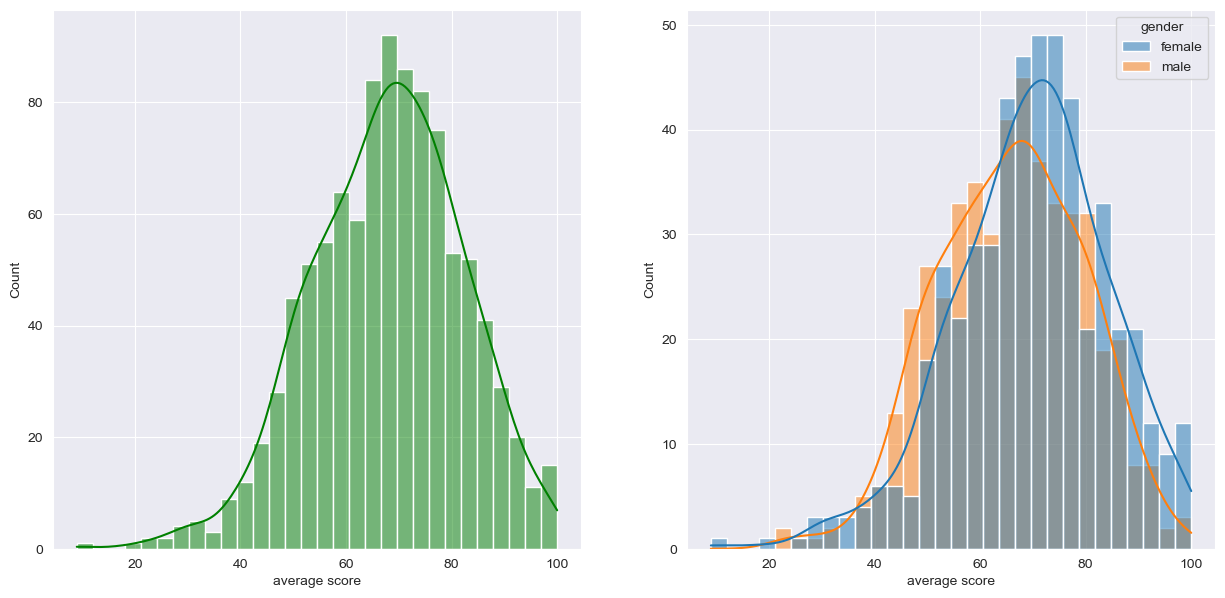

In [85]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', bins = 30, kde=True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average score', bins = 30, kde=True, hue = 'gender')
plt.show()

Female students are performing better than their male counterparts

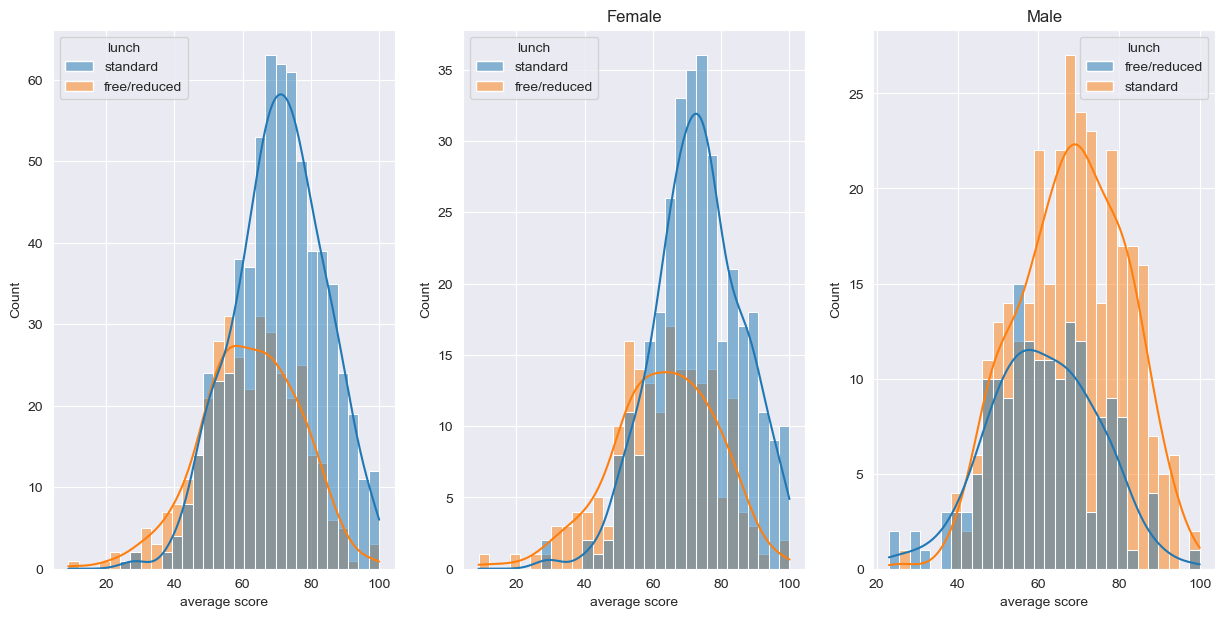

In [100]:
fig, axs = plt.subplots(1,3, figsize = (15,7))
plt.subplot(131)
sns.histplot(data = df, x = 'average score', bins = 30, kde=True, color = 'g', hue = 'lunch')
plt.subplot(132)
plt.title('Female')
sns.histplot(data = df[df['gender']=='female'], x = 'average score', bins = 30, kde=True, hue = 'lunch')
plt.subplot(133)
plt.title('Male')
sns.histplot(data = df[df['gender']=='male'], x = 'average score', bins = 30, kde=True, hue = 'lunch')

plt.show()

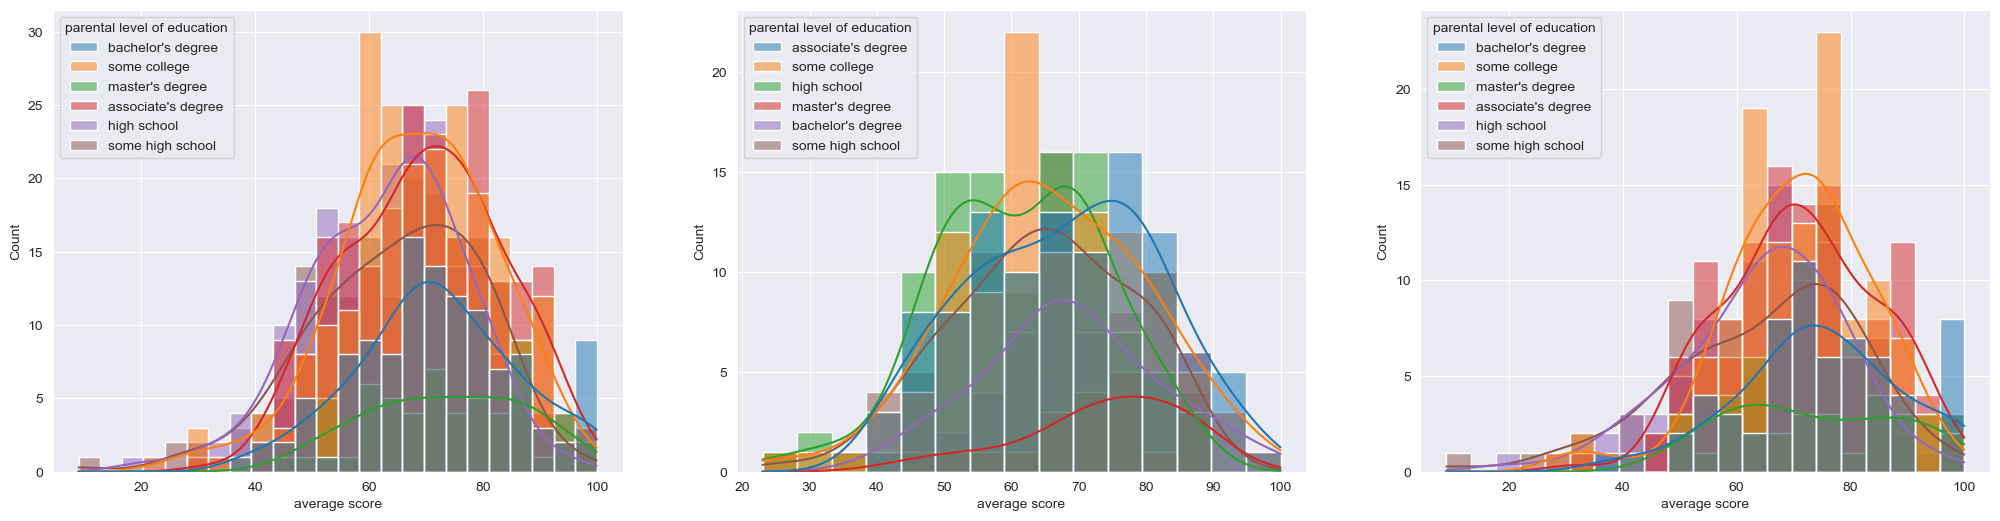

In [108]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

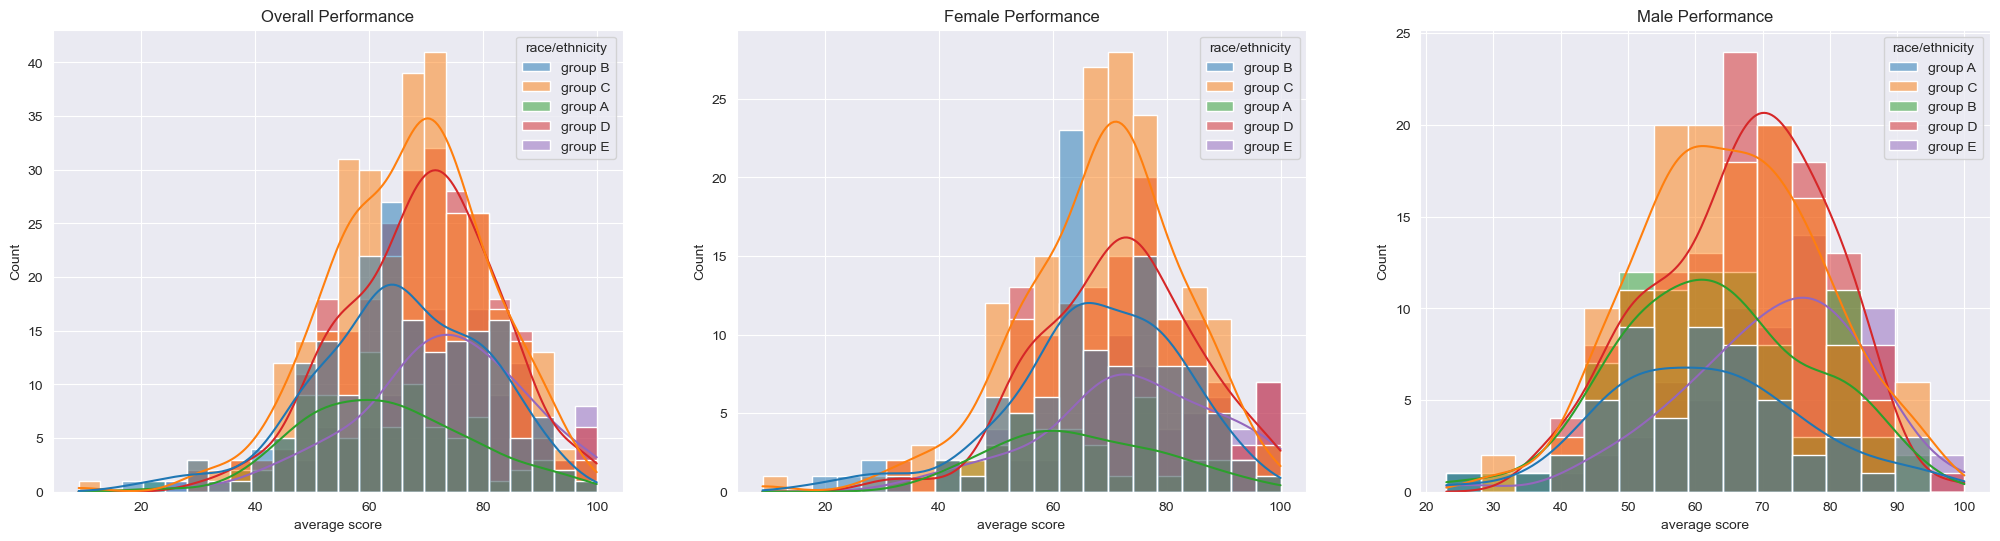

In [112]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title('Overall Performance')
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(132)
plt.title('Female Performance')
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(133)
plt.title('Male Performance')
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

Students in group A and B tend to perform relatively worse overall and irrespective of gender

#### Maximumum score of students in all three subjects¶

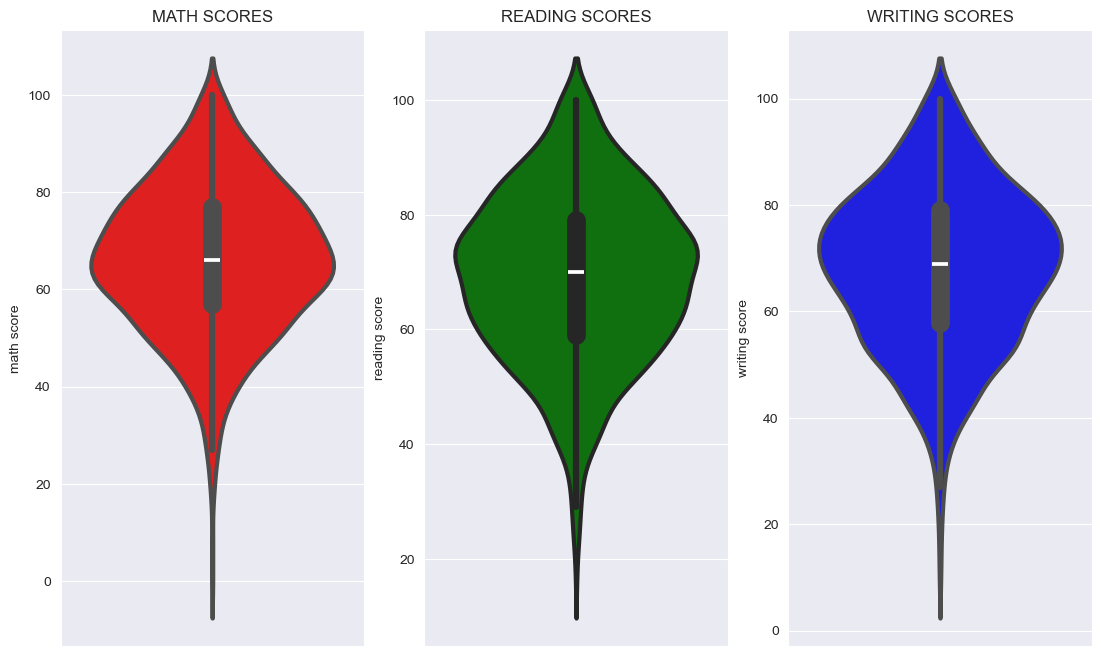

In [115]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Multivariate Analysis using pyplot

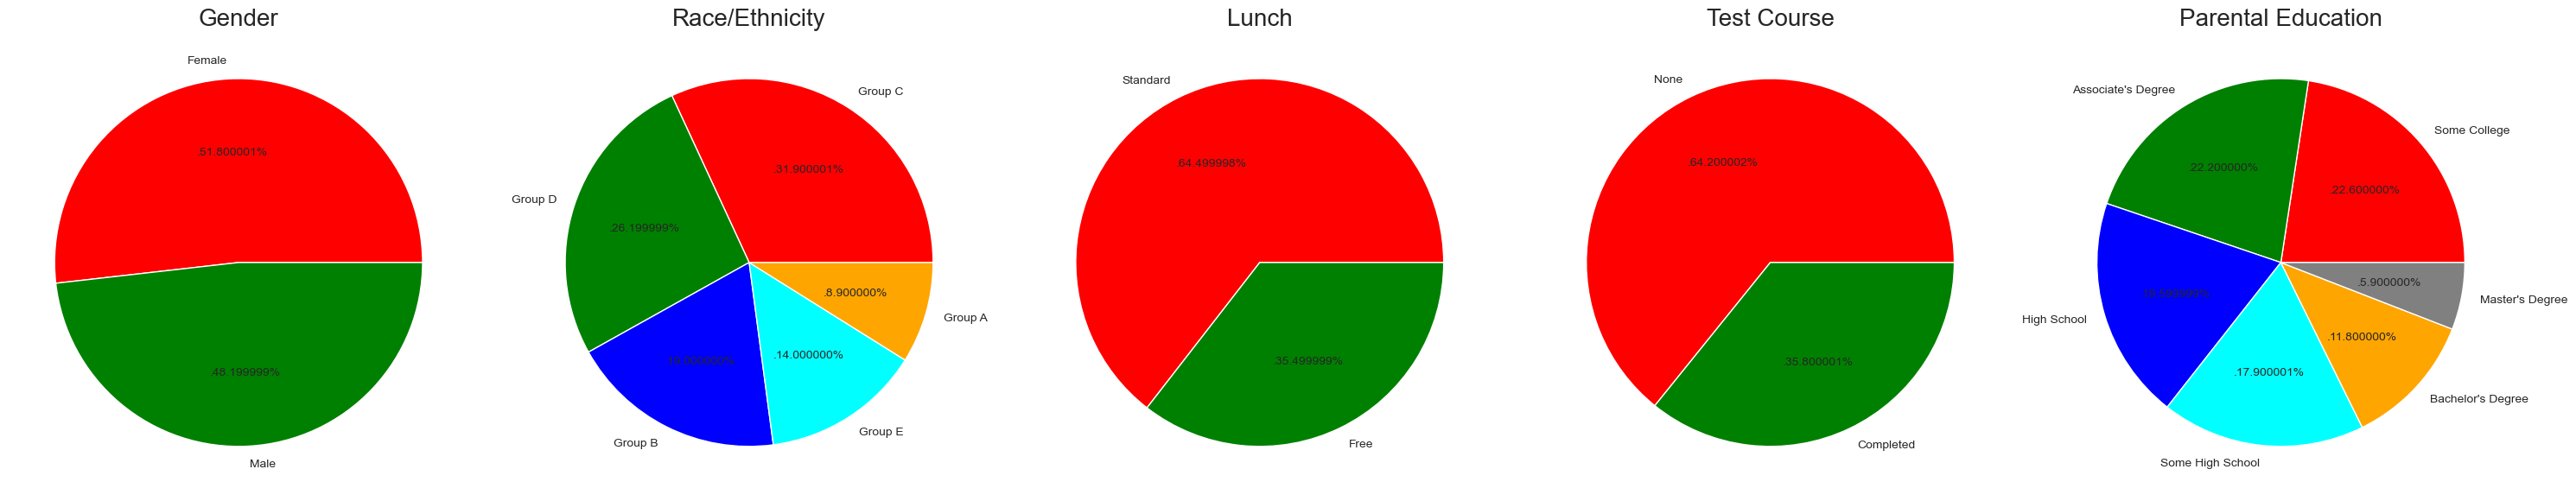

In [119]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

- Gender sample is virtually balanced
- There is a small amount of Group A in the classroom
- Most of the lunch is standard
- Most students have not completed their test prep cours
- Only 5% of parents possess a masters degree

## Feature level Visualization

#### Gender

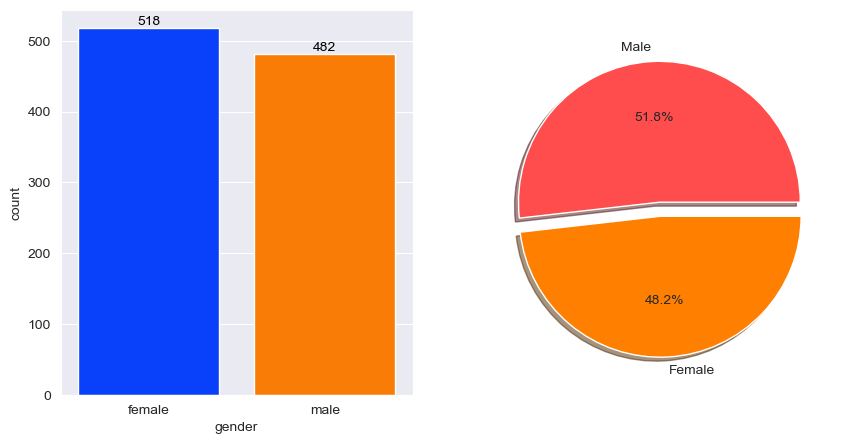

In [128]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Does gender have any impact on students performance?

In [135]:
gender_group = df.groupby('gender')[df.select_dtypes(include = ['number']).columns].mean()
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


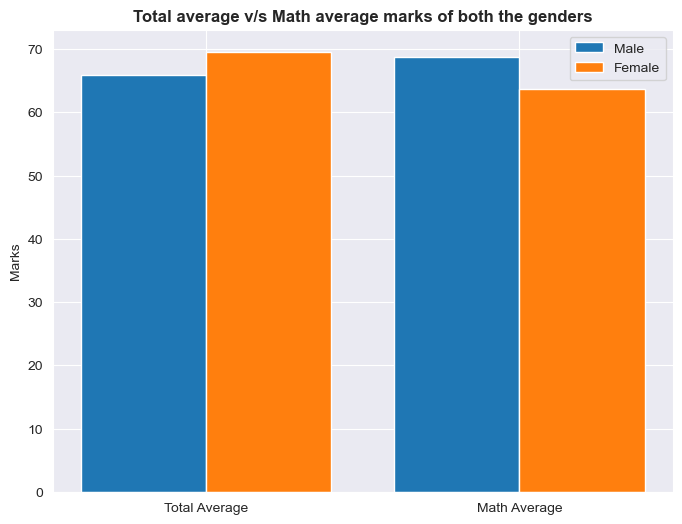

In [145]:
plt.figure(figsize=(8, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- The male students performed better on averga ein maths whereas the female students performed better overall 

#### Race/Ethnicity

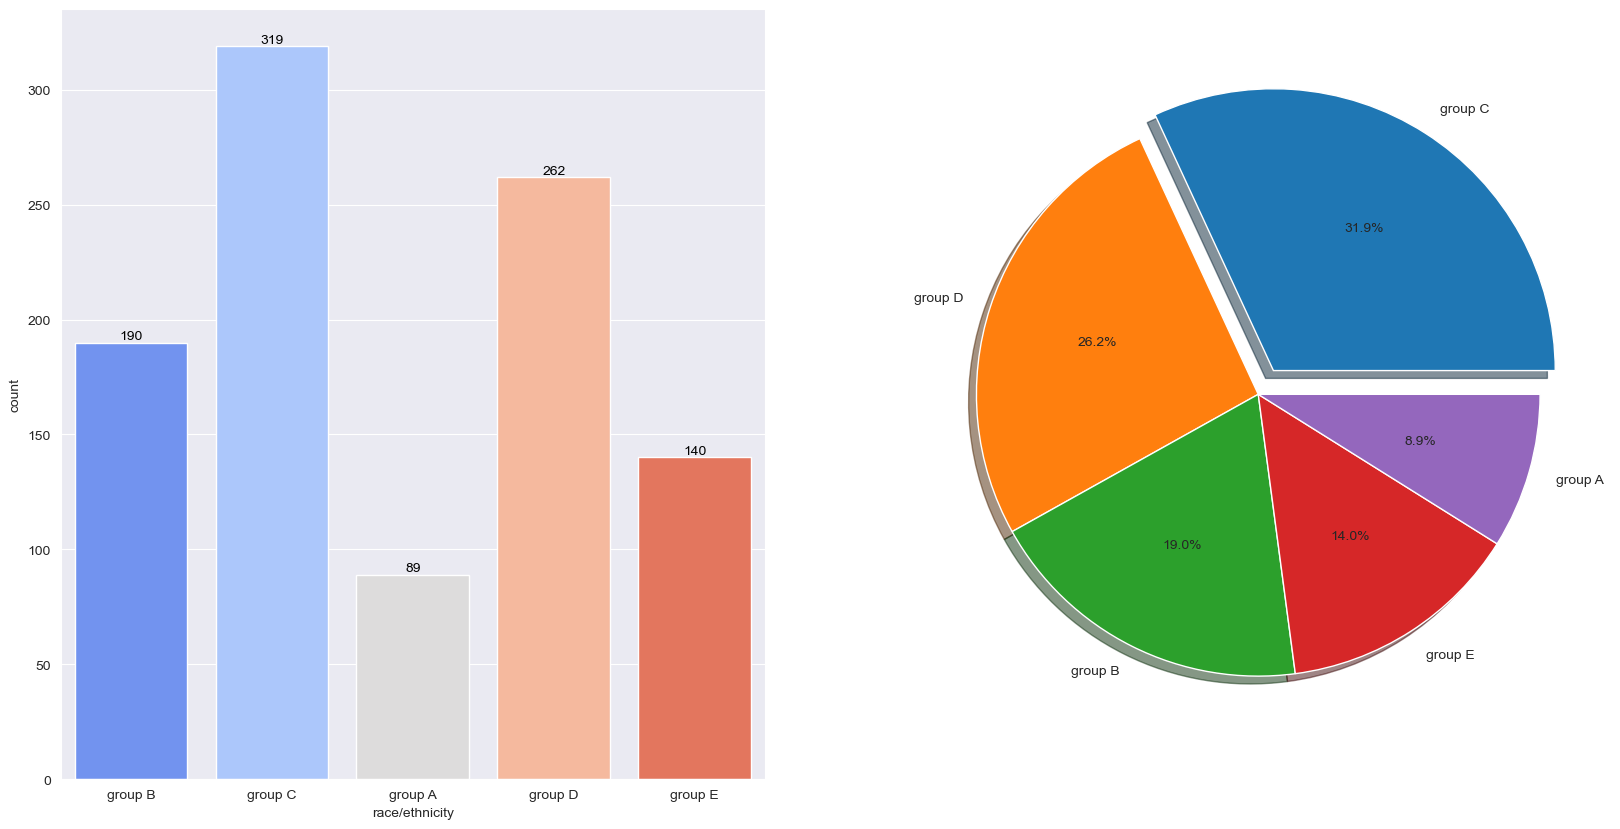

In [159]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'coolwarm',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the students arefrom group C with the least amount of students in group A

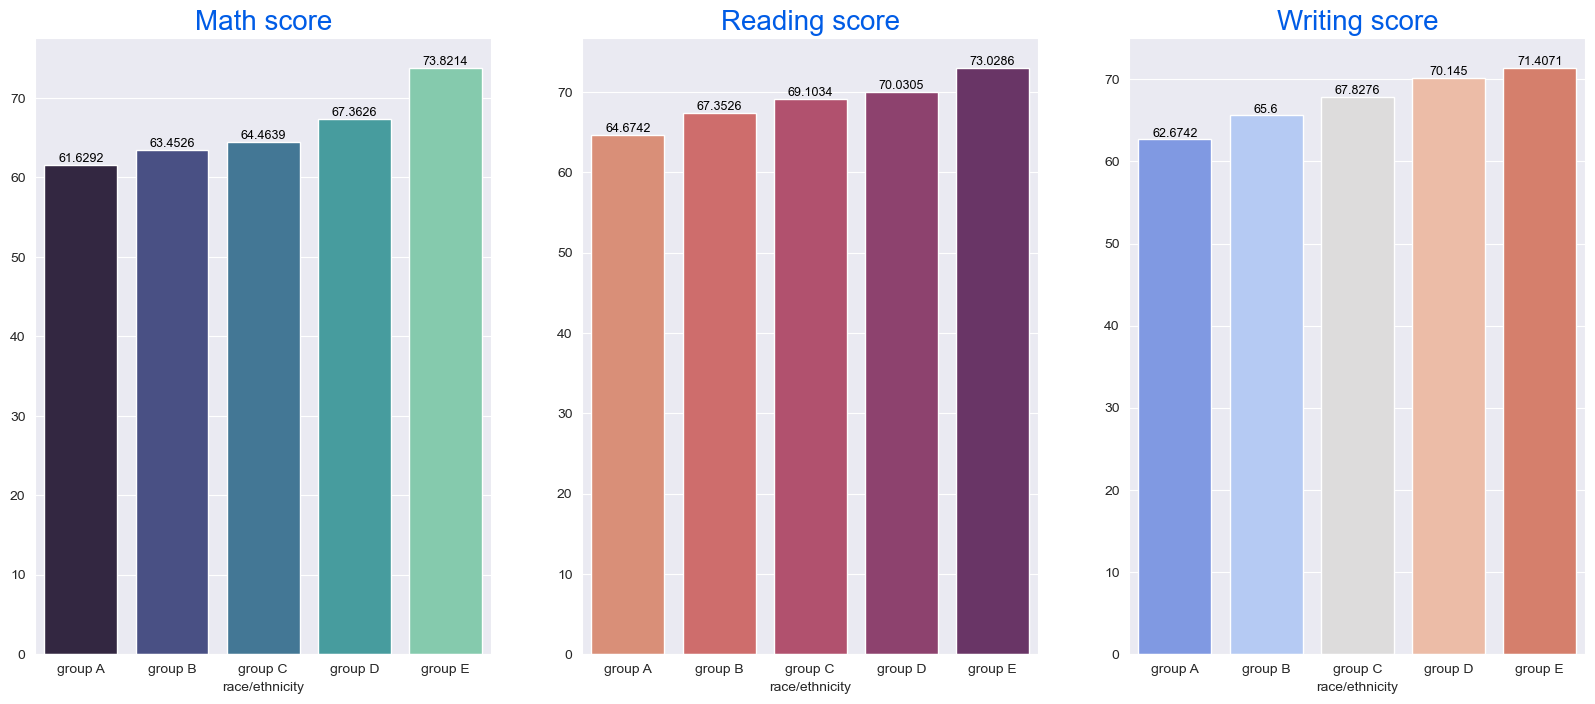

In [168]:
# Does race have any impact on student performance
race_group=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group['math score'].mean().index,y=race_group['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=9)

sns.barplot(x=race_group['reading score'].mean().index,y=race_group['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=9)

sns.barplot(x=race_group['writing score'].mean().index,y=race_group['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=9)

- Students in group E perform the best overall
- Students in group A have the lowest average scores

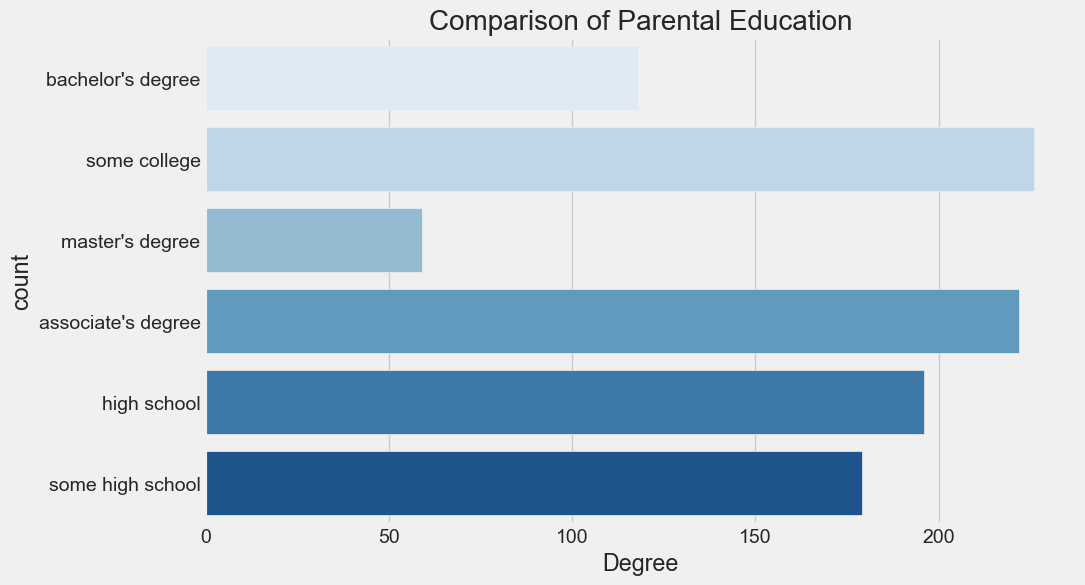

In [173]:
#### PArents level of education
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Test prep course

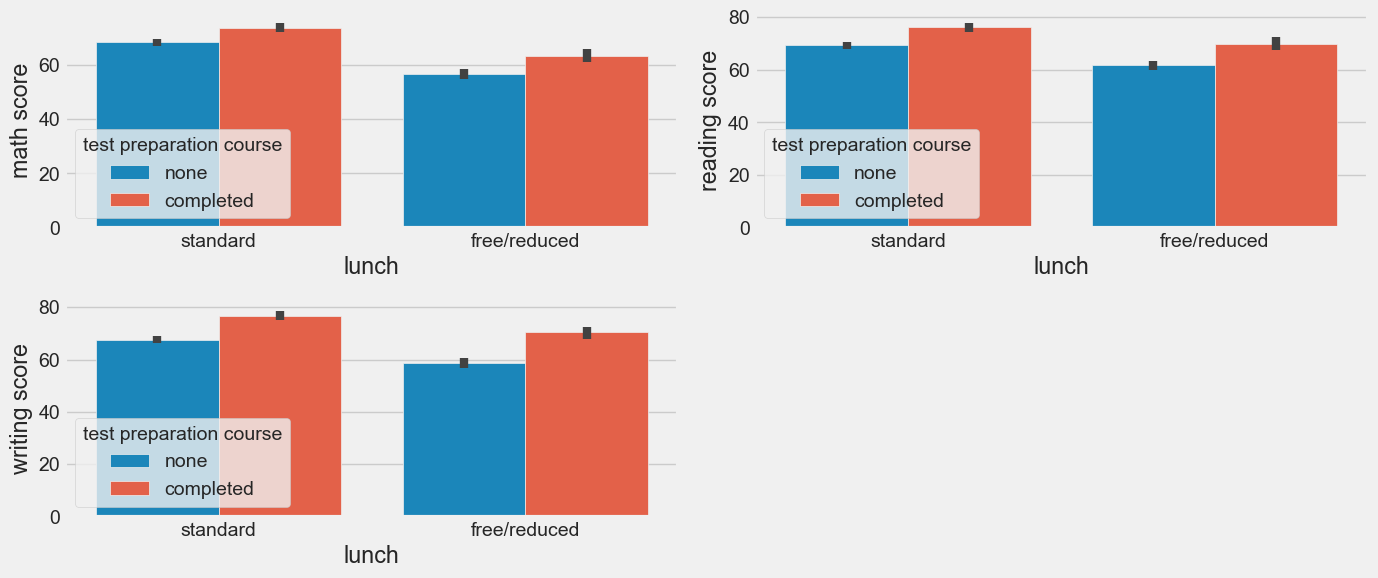

In [180]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.tight_layout()
plt.show()

- Studnets who took the test prep course always performed better than students who did not